# Self Organizing Map

In [9]:
!pip install MiniSom

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

### Read and Feature Scale the Data

In [16]:
dataset = pd.read_csv("./som/credit_card_applications.csv")

In [18]:
scaler = MinMaxScaler(feature_range= (0,1))
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
X = scaler.fit_transform(X)

### Training the SOM

In [23]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [24]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

### Visualizing the Resuls

operands could not be broadcast together with shapes (690,15) (10,10,15) 


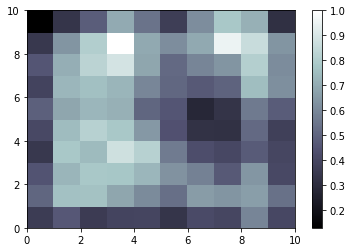

In [29]:
try:
    bone()
    pcolor(som.distance_map().T)
    colorbar()
    markers = ['o', 's']
    colors = ['r','b']
    for i, x in enumerate(X):
        winner = som.winner(X)
        plot(
            winner[0] + 0.5,
            winner[1] + 0.5,
            markers[y[i]],
            markeredgecolor = colors[y[i]],
            markerfacecolor = 'None',
            markersize = 10,
            markeredgewidth = 2)
    show()
except ValueError as e:
    print(e)

### Searching for frauds

In [42]:
mappings = som.win_map(X)
mappings_tuple = (mappings[(1,1)], mappings[(2,1)])
frauds = np.concatenate(
    mappings_tuple,
    axis = 0
)
frauds = scaler.inverse_transform(frauds)

In [46]:
for customerId in frauds[:,0]:
    print("Fraud customer Id {}".format(int(customerId)))

Fraud customer Id 15803378
Fraud customer Id 15788776
Fraud customer Id 15764444
Fraud customer Id 15771409
Fraud customer Id 15814116
Fraud customer Id 15777893
Fraud customer Id 15813718
Fraud customer Id 15815271
Fraud customer Id 15744273
Fraud customer Id 15773934
Fraud customer Id 15694237
Fraud customer Id 15805627
Fraud customer Id 15692718
Fraud customer Id 15789865
Fraud customer Id 15618703
Fraud customer Id 15757933
Fraud customer Id 15677395
Fraud customer Id 15810716
